## Scraping the information about tours from https://adriatic-travel.com.ua/

The site is specialized in tours to Europe and has a lot of scheduled tours.

The tours are presented on 12 pages from
https://adriatic-travel.com.ua/tour-announce to https://adriatic-travel.com.ua/tour-announce?page=12
#### The information to scrap:
 - Name of tour
 - Date of tour
 - Price
 - Place to start the tour
 - Amount of days
 - Number of overnight trips
 - Countries to visit
 - Cities to visit
 - Scheduled tour start dates

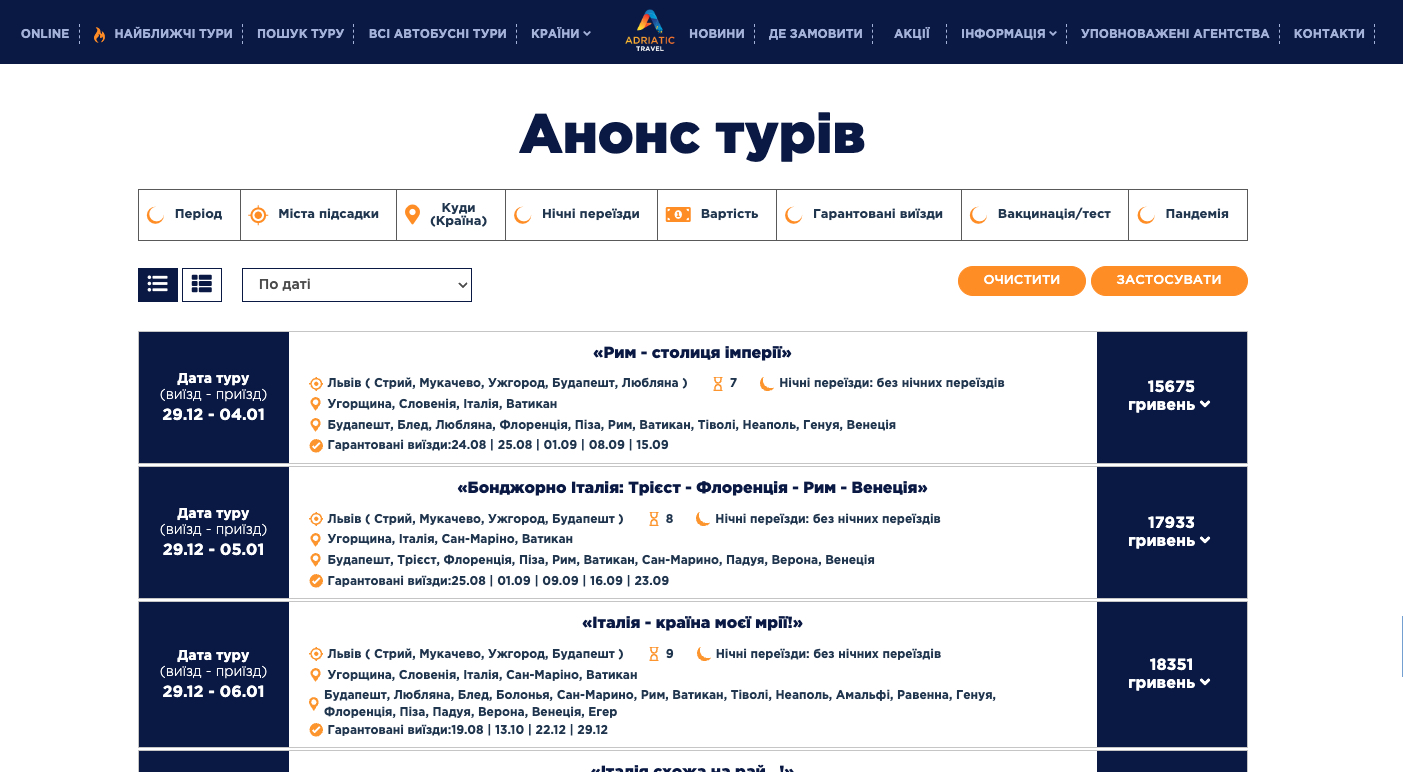

<p>Import libraries <b>requests</b>, <b>BeautifulSoup</b> from bs4 and <b>pandas</b>:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

List to save data about tours:

In [2]:
tours_list=[]

Use loop for pages from 1 to 12 to scrape information and than show it

In [3]:
for page_number in range(1, 12+1):
    
    #insert the URL containing a parameter 'page_number' that will change from 1 to 12 to scrape all pages
    url = f'https://adriatic-travel.com.ua/tour-announce?page={page_number}'
    req = requests.get(url)
    soup = BeautifulSoup(req.text, 'html.parser')
    
    #find all tour cards
    tour_cards = soup.find('div', class_='tour_search_list').find_all('div', class_='tour_item_sm')
    
    #get information from every card
    for card in tour_cards:
        
        tour_name = card.find('h2', class_='tour_name').text #get the tour name
        tour_dates = card.find('div', class_='date').text #get the tour date
        
        #get the tour price and replace with short currency abbreviation
        tour_price = card.find('div', class_='tour_price').text.replace('гривень','грн')
        
        #get the extra information block information
        extra_info = card.find_all('div', class_='tour_inf')

        #get the info from 1-5 points
        if len(extra_info) > 0:
            tour_start_place = extra_info[0].text.strip()  #get the place to start the tour
            amount_of_days = extra_info[1].text.strip()    #get the amount of days
            overnight_trips =  extra_info[2].text.strip()  #get the number of overnight trips
            countries_to_visit = extra_info[3].text.strip()#get the countries to visit
            cities_to_visit = extra_info[4].text.strip()   #get the cities to visit

        # if there is point #6 get also get information or skip it
        if len(extra_info) > 5 and extra_info[5] != '':
            planned_start_days = extra_info[5].text.strip()  #get the scheduled tour start dates
        else:
            planned_start_days = 'Немає інформації'
        
        #add data to the list
        tours_list.append([tour_name, tour_dates, tour_price, tour_start_place,  amount_of_days, overnight_trips, countries_to_visit, cities_to_visit, planned_start_days])  

df = pd.DataFrame(tours_list, columns=['Назва туру', 'Дати', 'Ціна', 'Початкова локація', 'К-ть днів', 'Нічні переїзди', 'Відвідувані країни', ' Відвідувані міста', 'Виїзди'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("Scraping was succesful! Here you can see 5 first records and than 5 last ones:")
display(df.head(5))
display(df.tail(5))



Scraping was succesful! Here you can see 5 first records and than 5 last ones:


,Назва туру,Дати,Ціна,Початкова локація,К-ть днів,Нічні переїзди,Відвідувані країни,Відвідувані міста,Виїзди
0,«Веселі канікули: 3 дні в Парижі + Нормандія т...,13.08 - 19.08,13794 грн,Львів,7,Нічні переїзди: 2,"Польща, Німеччина, Франція, Чехія","Краків, Берлін, Париж, Руан, Довіль, Трувіль-с...",Гарантовані виїзди: 13.08 | 20.08 | 27.08 | 1...
1,"«За покликом серця… Норвегія!» (Язик Троля, 8 ...",14.08 - 23.08,30514 грн,Львів,10,Нічні переїзди: без нічних переїздів,"Польща, Данія, Норвегія, Швеція","Варшава, Гданськ, Сопот, Копенгаген, Флом, Бер...",Гарантовані виїзди: 14.08 | 09.09 | 23.09
2,«Автобус в Болгарію зі Львова!»,16.08 - 16.08,3135 грн,"Львів ( Стрий, Долина, Калуш, Івано-Франківськ...",1,Нічні переїзди: 1,"Україна, Болгарія","Балчик, Албена, Кранево, Золоті Піски, Св. Кос...",Немає інформації
3,«Автобус в Болгарію з Києва!»,16.08 - 16.08,3553 грн,"Київ ( Житомир, Вінниця, Хмельницький, Кам'яне...",1,Нічні переїзди: 1,Болгарія,"Балчик, Албена, Кранево, Золоті Піски, Св. Кос...",Немає інформації
4,"«Італійський вікенд... Венеція, Флоренція, Рим»",17.08 - 21.08,10409 грн,"Львів ( Стрий, Мукачево, Ужгород )",5,Нічні переїзди: 2,"Угорщина, Італія, Ватикан","Будапешт, Венеція, Рим, Ватикан, Флоренція, Піза",Гарантовані виїзди: 17.08 | 24.08 | 31.08 | 0...


,Назва туру,Дати,Ціна,Початкова локація,К-ть днів,Нічні переїзди,Відвідувані країни,Відвідувані міста,Виїзди
554,«Автобус в Туреччину зі Львова!»,30.12 - 31.12,5643 грн,Львів,2,Нічні переїзди: 1,"Румунія, Болгарія, Туреччина","Бухарест, Велико-Тирново, Стамбул",Немає інформації
555,«Побачення на двох - Венеція і Верона…»,30.12 - 02.01,6270 грн,"Львів ( Стрий, Мукачево, Ужгород, Будапешт, Лю...",4,Нічні переїзди: 2,"Угорщина, Італія","Егер, Будапешт, Венеція, Верона",Гарантовані виїзди: 24.08 | 25.08 | 08.09 | 1...
556,«Закохані в море: Венеція + Трієст»,30.12 - 02.01,6270 грн,"Львів ( Стрий, Мукачево, Ужгород, Будапешт, Лю...",4,Нічні переїзди: 2,"Угорщина, Італія, Словенія","Егер, Будапешт, Венеція, Трієст, Піран",Гарантовані виїзди: 24.08 | 25.08 | 08.09 | 1...
557,"«Смак Словенії: Піран, Блед та Любляна»",30.12 - 03.01,9823 грн,"Львів ( Стрий, Мукачево, Ужгород )",5,Нічні переїзди: без нічних переїздів,"Угорщина, Словенія","Будапешт, Любляна, Блед, Піран, Порторож",Гарантовані виїзди: 17.08 | 24.08 | 31.08 | 0...
558,«Морські пригоди: Італія та Словенія»,30.12 - 03.01,9823 грн,Львів,5,Нічні переїзди: без нічних переїздів,"Угорщина, Італія, Словенія","Будапешт, Венеція, Любляна, Блед, Піран, Порторож",Гарантовані виїзди: 17.08 | 24.08 | 31.08 | 0...


In [4]:
print(f"Загальна кількість турів : {len(df)}")

Загальна кількість турів : 559


#### We could see 559 tours with full information about them

To check the correctness of scraping we could look at the last tour from page 12:

In [5]:
print(df.at[df.index[-1], 'Назва туру'])

«Морські пригоди: Італія та Словенія»


#### It is the same as in the scraped list

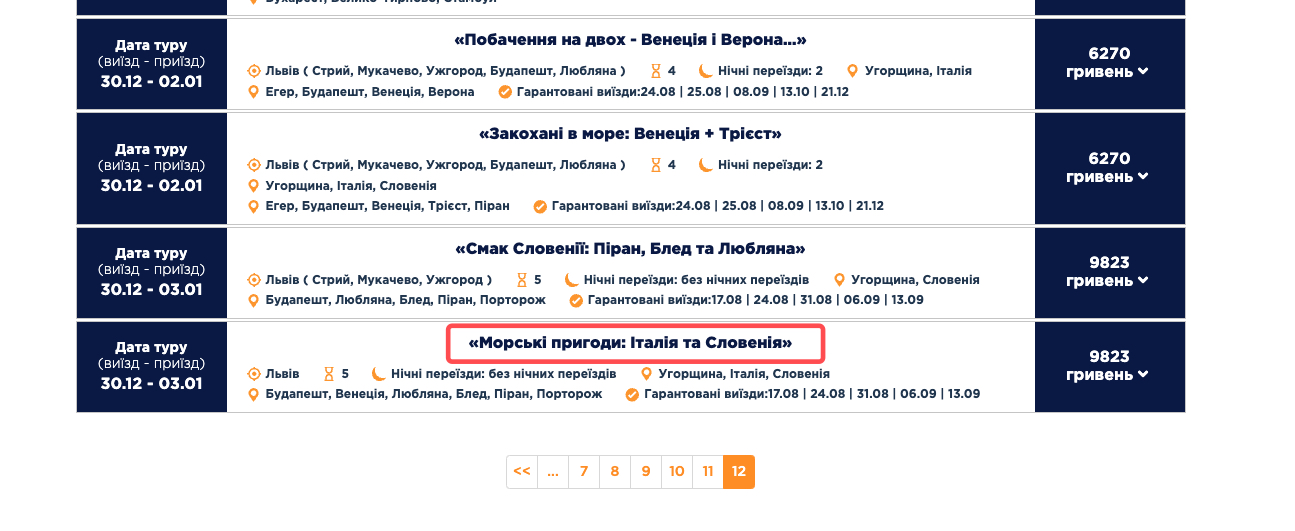

Let's save it in JSON format

In [6]:
#import library
import json

# save the data as a JSON file
with open('tours_data.json', 'w', encoding='utf-8') as json_file:
    json.dump(tours_list, json_file, ensure_ascii=False, indent=4)

print("Data saved to 'tours_data.json'")

Data saved to 'tours_data.json'
